In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import jinja2

In [104]:
Billionair_dataset = pd.read_excel("Billionaires_Statistics_Dataset_2023.xlsx")
Billionair_dataset

,Rank,FinalWorth,Category,PersonName,age,Country,Source,Industries,SelfMade,Gender,GrossTertiaryEducationEnrollment,GrossPrimaryEducationEnrollment,LifeExpectancyCountry
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,LVMH,Fashion & Retail,False,M,65.6,102.5,82.5
1,2,180000,Automotive,Elon Musk,51,United States,"Tesla, SpaceX",Automotive,True,M,88.2,101.8,78.5
2,3,114000,Technology,Jeff Bezos,59,United States,Amazon,Technology,True,M,88.2,101.8,78.5
3,4,107000,Technology,Larry Ellison,78,United States,Oracle,Technology,True,M,88.2,101.8,78.5
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Berkshire Hathaway,Finance & Investments,True,M,88.2,101.8,78.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,982,3000,Finance & Investments,Stephen Deckoff,57,United States,Private equity,Finance & Investments,True,M,88.2,101.8,78.5
997,982,3000,Metals & Mining,Feng Hailiang,62,China,"Copper, education",Metals & Mining,True,M,50.6,100.2,77.0
998,982,3000,Automotive,"Ernest Garcia, II.",65,United States,Used cars,Automotive,True,M,88.2,101.8,78.5
999,982,3000,Food & Beverage,Sam Goi,76,Singapore,Frozen foods,Food & Beverage,True,M,84.8,100.6,83.1


In [56]:
#Cleaning data by making column naming consistant
Billionair_dataset.rename(columns={'age': 'Age'}, inplace=True)
Billionair_dataset.head()

,Rank,FinalWorth,Category,PersonName,Age,Country,Source,Industries,SelfMade,Gender,GrossTertiaryEducationEnrollment,GrossPrimaryEducationEnrollment,LifeExpectancyCountry
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,LVMH,Fashion & Retail,False,M,65.6,102.5,82.5
1,2,180000,Automotive,Elon Musk,51,United States,"Tesla, SpaceX",Automotive,True,M,88.2,101.8,78.5
2,3,114000,Technology,Jeff Bezos,59,United States,Amazon,Technology,True,M,88.2,101.8,78.5
3,4,107000,Technology,Larry Ellison,78,United States,Oracle,Technology,True,M,88.2,101.8,78.5
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Berkshire Hathaway,Finance & Investments,True,M,88.2,101.8,78.5


In [61]:
Billionair_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1001.0,493.771229,283.814504,1.0,249.0,497.0,748.0,982.0
FinalWorth,1001.0,9313.086913,14806.863225,3000.0,3800.0,5300.0,8200.0,211000.0
Age,1001.0,67.174825,13.159803,18.0,58.0,67.0,77.0,99.0
GrossTertiaryEducationEnrollment,1001.0,70.598801,19.756235,10.1,51.3,70.6,88.2,136.6
GrossPrimaryEducationEnrollment,1001.0,102.708492,3.830232,84.7,101.2,101.8,102.7,126.6
LifeExpectancyCountry,943.0,78.383033,3.642485,54.3,77.0,78.5,80.9,84.2


In [62]:
LifeExpectancyCountry=Billionair_dataset['LifeExpectancyCountry'].describe()

In [63]:
empty_life_count = Billionair_dataset['LifeExpectancyCountry'].isnull().sum()
total_entries = len(Billionair_dataset)
if empty_life_count > 0:
    print("There are", empty_life_count, "empty life expectency values from", total_entries, "entries.")
else:
    print("There are no empty life expectency cells.")

There are 58 empty life expectency values from 1001 entries.


In [64]:
#Avarage inserted to all empty Life Expectency cells
column_name = 'LifeExpectancyCountry'
number_to_add = 78.3
empty_cells = Billionair_dataset[column_name].isnull()
Billionair_dataset.loc[empty_cells, column_name] = number_to_add

In [65]:
empty_life_count = Billionair_dataset['LifeExpectancyCountry'].isnull().sum()
total_entries = len(Billionair_dataset)
if empty_life_count > 0:
    print("There are", empty_life_count, "empty life expectency values from", total_entries, "entries.")
else:
    print("There are no empty life expectency cells.")

There are no empty life expectency cells.


In [66]:
Billionair_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1001.0,493.771229,283.814504,1.0,249.0,497.0,748.0,982.0
FinalWorth,1001.0,9313.086913,14806.863225,3000.0,3800.0,5300.0,8200.0,211000.0
Age,1001.0,67.174825,13.159803,18.0,58.0,67.0,77.0,99.0
GrossTertiaryEducationEnrollment,1001.0,70.598801,19.756235,10.1,51.3,70.6,88.2,136.6
GrossPrimaryEducationEnrollment,1001.0,102.708492,3.830232,84.7,101.2,101.8,102.7,126.6
LifeExpectancyCountry,1001.0,78.378222,3.535328,54.3,77.0,78.5,80.9,84.2


In [67]:
#Finding final worth range
Billionair_dataset['FinalWorth'].max()-Billionair_dataset['FinalWorth'].min()

208000

array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'FinalWorth'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'GrossTertiaryEducationEnrollment'}>],
       [<Axes: title={'center': 'GrossPrimaryEducationEnrollment'}>,
        <Axes: title={'center': 'LifeExpectancyCountry'}>]], dtype=object)

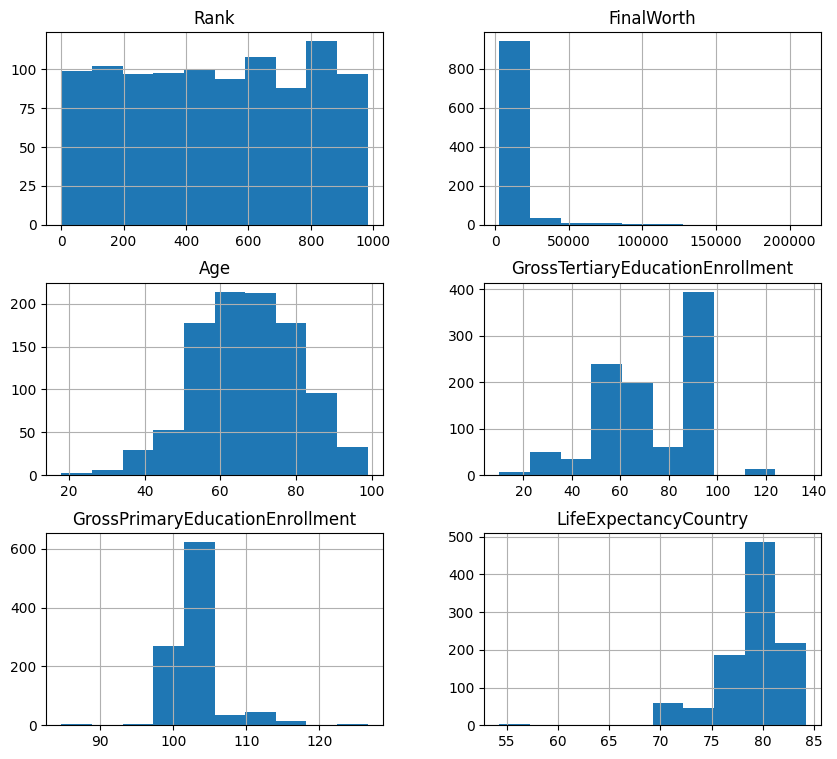

In [68]:
#Displaying dataset histogram
Billionair_dataset.hist(figsize=(10,9))

Text(0.5, 0, 'Number of people')

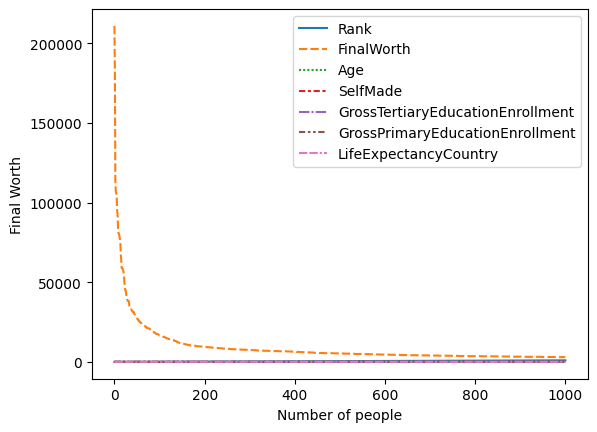

In [69]:
#This will display a line graph
sns.lineplot(Billionair_dataset)
plt.ylabel('Final Worth')
plt.xlabel('Number of people')

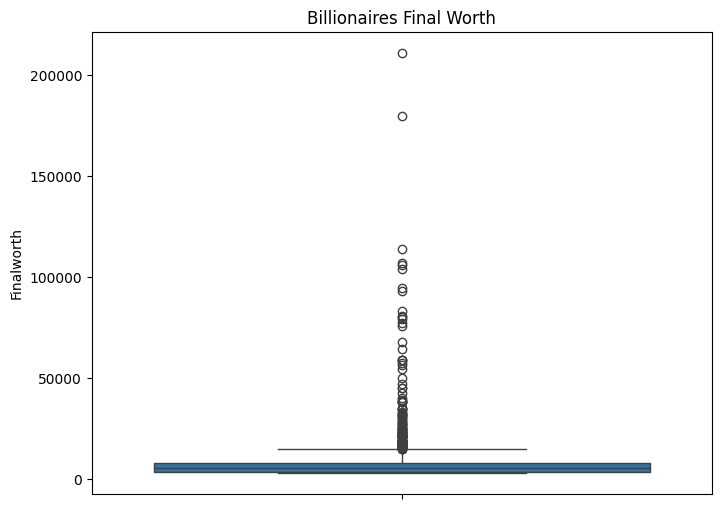

In [70]:
#This will display a box and whisker diagram
plt.figure(figsize=(8,6))
sns.boxplot(Billionair_dataset['FinalWorth'])
plt.title('Billionaires Final Worth', size=12)
plt.ylabel('Finalworth')
plt.show()

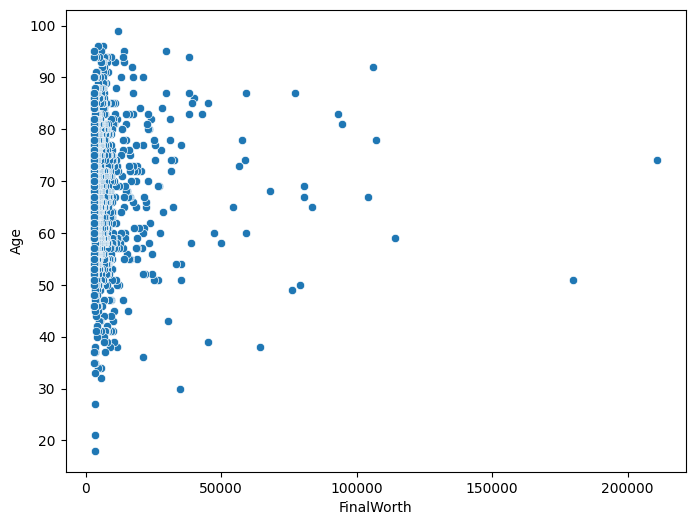

In [73]:
#Scatter plot reflecting the relationship between age and final worth
plt.figure(figsize=(8,6))
sns.scatterplot(x='FinalWorth',y='Age',data=Billionair_dataset)
plt.show()

In [99]:
#Correlation amongst columns of interest
interest_col = Billionair_dataset[['Rank','FinalWorth','Age','GrossTertiaryEducationEnrollment','GrossPrimaryEducationEnrollment','LifeExpectancyCountry']]
corr = interest_col.corr()
formatted_corr = corr.applymap(lambda x: f'{x:.6f}')
corr_style = formatted_corr.style.background_gradient(cmap='coolwarm', axis=None)
corr_style

C:\Users\Bless\AppData\Local\Temp\ipykernel_18508\1024256223.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_corr = corr.applymap(lambda x: f'{x:.6f}')


,Rank,FinalWorth,Age,GrossTertiaryEducationEnrollment,GrossPrimaryEducationEnrollment,LifeExpectancyCountry
Rank,1.000000,-0.520435,-0.030487,-0.015856,0.020100,0.030349
FinalWorth,-0.520435,1.000000,0.033504,0.035006,-0.002958,0.003263
Age,-0.030487,0.033504,1.000000,0.081894,0.088170,0.039532
GrossTertiaryEducationEnrollment,-0.015856,0.035006,0.081894,1.000000,-0.324689,0.450849
GrossPrimaryEducationEnrollment,0.020100,-0.002958,0.088170,-0.324689,1.000000,-0.210637
LifeExpectancyCountry,0.030349,0.003263,0.039532,0.450849,-0.210637,1.000000


Text(0.5, 1.0, 'Heatmap')

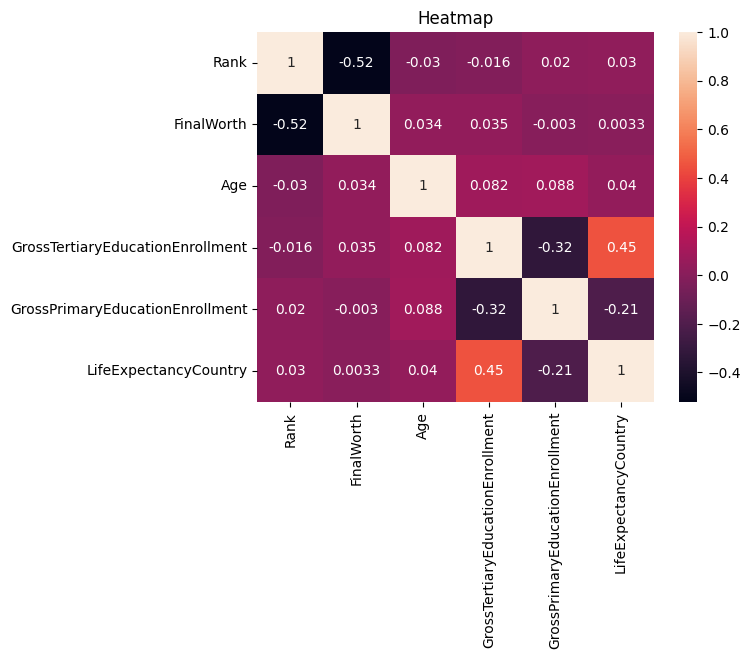

In [100]:
#Display a heatmap
sns.heatmap(corr, annot=True)
plt.title('Heatmap')

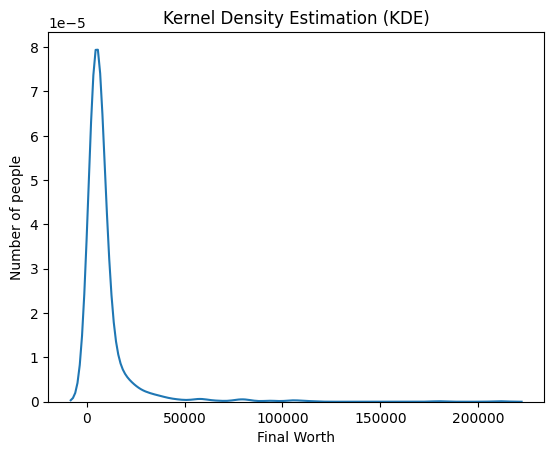

In [103]:
sns.kdeplot(Billionair_dataset['FinalWorth'])
plt.xlabel('Final Worth')  
plt.ylabel('Number of people')  
plt.title('Kernel Density Estimation (KDE)') 
plt.show()